<a href="https://colab.research.google.com/github/amrit-lal-singh/ML-Dl/blob/main/NN-MNIST-Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_cv , X_tr = X_train[:5000]/255.0 , X_train[5000:]/255.0

In [5]:
Y_cv, Y_tr = Y_train[:5000],Y_train[5000:]

In [6]:
class_names = [
 "T-shirt/top",
 "Trouser",
 "Pullover",
 "Dress",
 "Coat",
 "Sandal",
 "Shirt",
 "Sneaker",
 "Bag",
 "Ankle boot"
]

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))




In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 100)               40100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


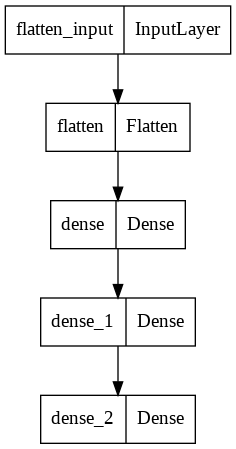

In [9]:
keras.utils.plot_model(model)

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("NN_MNIST_Fashion.h5")
early_stopping__cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))

In [11]:
history = model.fit(X_tr, Y_tr, epochs=100,validation_data=(X_cv, Y_cv),callbacks = [checkpoint_cb, early_stopping__cb])

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7045 - accuracy: 0.7695 - val_loss: 0.5454 - val_accuracy: 0.8154
Epoch 2/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4825 - accuracy: 0.8308 - val_loss: 0.4831 - val_accuracy: 0.8306
Epoch 3/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4371 - accuracy: 0.8472 - val_loss: 0.4311 - val_accuracy: 0.8438
Epoch 4/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4083 - accuracy: 0.8558 - val_loss: 0.3877 - val_accuracy: 0.8670
Epoch 5/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3902 - accuracy: 0.8615 - val_loss: 0.3869 - val_accuracy: 0.8628
Epoch 6/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3738 - accuracy: 0.8686 - val_loss: 0.3925 - val_accuracy: 0.8594
Epoch 7/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3604 - accuracy: 0.8719 - val_loss: 0.3592 - val_accuracy:

In [12]:
print(history.history)

{'loss': [0.704522967338562, 0.48247694969177246, 0.43712368607521057, 0.40825390815734863, 0.3902345597743988, 0.37378713488578796, 0.3604370355606079, 0.34819215536117554, 0.3397429287433624, 0.3295135796070099, 0.32149073481559753, 0.3138582110404968, 0.3066795766353607, 0.29878902435302734, 0.2926425039768219, 0.28587576746940613, 0.2805260717868805, 0.275299996137619, 0.26946455240249634, 0.26448673009872437, 0.26004335284233093, 0.2542368471622467, 0.2502906322479248, 0.24599148333072662, 0.24146084487438202, 0.23700015246868134, 0.2329532504081726, 0.22970102727413177, 0.22522476315498352, 0.22217611968517303, 0.21833088994026184, 0.2141292542219162, 0.2114287167787552, 0.20778335630893707, 0.20448359847068787, 0.20082713663578033, 0.19687974452972412, 0.1937776803970337, 0.19141511619091034, 0.1867857724428177, 0.18483680486679077, 0.1820807009935379, 0.1786411553621292, 0.174668550491333, 0.17216885089874268, 0.17085792124271393, 0.1663363128900528, 0.16506370902061462, 0.1620

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt


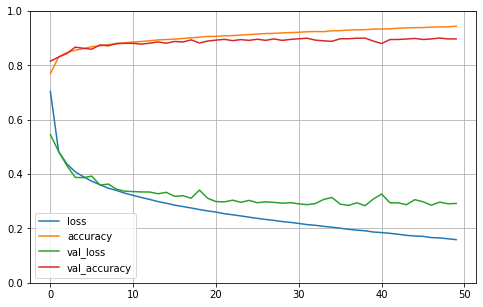

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# New Section

In [15]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 64.5181 - accuracy: 0.8632


[64.51805877685547, 0.8632000088691711]

In [16]:
X_new = X_test[:4]
Y_probablities = model.predict(X_new)
print(Y_probablities)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
model.save("NN-MNIST-Fashion.h5")